In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
opt_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,29
0,40,0.183416,0.779613,0.596790,0.445788,280.698069,0.459203,0.333675,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'HXutility' object has no attribute '_inlet_cost'
1,8,0.650823,0.056406,0.721927,0.938459,273.059965,0.992112,0.617420,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'MultiStageMixerSettlers' object has no attrib...
2,31,0.007066,0.023060,0.524722,0.399821,276.593256,0.973658,0.232748,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,list index out of range
3,5,0.618324,0.382424,0.983133,0.466716,339.215411,0.680240,0.450454,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'MultiStageMixerSettlers' object has no attrib...
4,2,0.942108,0.563232,0.385378,0.015965,290.778825,0.241001,0.683195,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,list index out of range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,12,0.325384,0.699475,0.549507,0.261455,290.104251,0.829084,0.262318,1.8333,4.2827,...,2.886465,5.0,1.0,0.100820,1.7023,4.5231,0.117933,0.667346,7.585004,NaN
1062,3,0.716321,0.777577,0.560404,0.234262,313.244372,0.125247,0.349230,1.5750,2.6782,...,1.802433,2.0,1.0,0.075540,1.4766,2.8008,0.149024,2.905502,7.078107,NaN
1063,15,0.887236,0.513687,0.564224,0.241825,327.847306,0.783064,0.470063,1.5125,1.9322,...,1.169754,5.0,1.0,0.088844,1.4372,1.9400,0.349605,1.233612,4.295380,NaN
1064,19,0.799318,0.570483,0.557234,0.248362,340.265585,0.040281,0.568146,1.2689,1.3756,...,0.744541,1.0,1.0,0.098649,1.1394,1.3766,0.240464,1.584926,5.618429,NaN


In [34]:

results_file = "~/MultiFidelity-ProcessOpt/3. Data/gp_bo_data_250403.csv"

# 최적화 결과 불러오기
opt_df = pd.read_csv(results_file)

# 27번과 28번 컬럼 이름 가져오기
col_27 = opt_df.columns[27]
col_28 = opt_df.columns[28]

# 해당 열 제거
opt_df = opt_df.drop(columns=[col_27, col_28])

print(f"✅ 열 제거 완료: {col_27}, {col_28}")
print(f"🔎 새로운 opt_df shape: {opt_df.shape}")

# 첫 100개만 사용
steps = 100
opt_df_100 = opt_df.iloc[100:100+900]

# 열 이름 지정 (이전에 사용한 columns 리스트 활용)
columns = [
    'Stages', '_Lr1', '_Hr1',
    '_Lr2', '_Hr2', '_T_hex',
    '_Lr3', '_Hr3',
    'Shortcut_CAPEX', 'Shortcut_OPEX', 'Shortcut_AceticAcidWt', 'Shortcut_SplitRatio',
    'Shortcut_BoilupRatio_1', 'Shortcut_NumberStages_1', 'Shortcut_FeedStage_1', 
    'Shortcut_BoilupRatio_2','Shortcut_NumberStages_2', 'Shortcut_FeedStage_2',
    'Shortcut_BoilupRatio_3', 'Shortcut_NumberStages_3', 'Shortcut_FeedStage_3', 'Shortcut_Time',
    'Rigorous_CAPEX', 'Rigorous_OPEX', 'Rigorous_AceticAcidWt', 'Rigorous_Time'
]




opt_df_100.columns = columns + ['Objective', 'Error']




✅ 열 제거 완료: 27, 28
🔎 새로운 opt_df shape: (1066, 28)


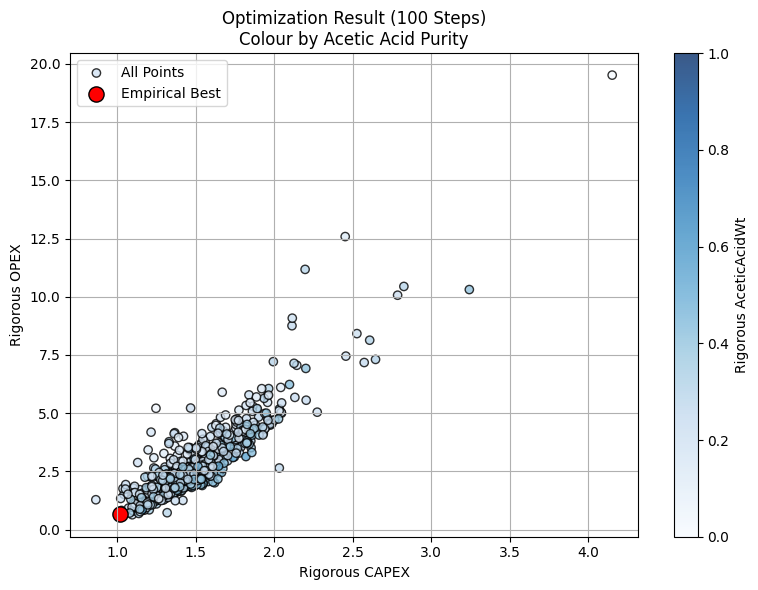

In [35]:
acetate_values = opt_df_100['Rigorous_AceticAcidWt'].fillna(0.0)  # NaN은 0으로 대체 (투명 처리용)
colors = plt.cm.Blues(acetate_values)  # 파란색 계열 색상

# 최적값 포인트 계산 (에러 없는 것 중에서)
valid_points = opt_df_100[opt_df_100['Error'].isna()].copy()
valid_points['Objective'] = valid_points['Rigorous_CAPEX'] + valid_points['Rigorous_OPEX']

empirical_best_idx = valid_points['Objective'].idxmin()
empirical_best = valid_points.loc[empirical_best_idx]
empirical_best_obj = empirical_best['Objective']

highlight_df = valid_points[
    (valid_points['Objective'] < empirical_best_obj) &
    (valid_points['Rigorous_AceticAcidWt'] >= 0.98)
]

# -- 시각화 시작 --
plt.figure(figsize=(8, 6))

# 전체 점: 색상은 AceticAcidWt 기준, 스케일은 0~1로 고정
scatter = plt.scatter(
    opt_df_100['Rigorous_CAPEX'], opt_df_100['Rigorous_OPEX'],
    c=acetate_values, cmap='Blues', edgecolors='k', alpha=0.8, vmin=0, vmax=1, label='All Points'
)

# Empirical Best (빨간색 동그라미)
plt.scatter(empirical_best['Rigorous_CAPEX'], empirical_best['Rigorous_OPEX'],
            color='red', s=120, edgecolors='black', label='Empirical Best')

# 별표 표시 (더 좋은 점들)
if not highlight_df.empty:
    plt.scatter(highlight_df['Rigorous_CAPEX'], highlight_df['Rigorous_OPEX'],
                marker='*', s=200, color='gold', edgecolors='black', label='Better Than Best')

# 컬러바
cbar = plt.colorbar(scatter)
cbar.set_label('Rigorous AceticAcidWt')
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # 0~1 고정

# 라벨 및 스타일
plt.xlabel('Rigorous CAPEX')
plt.ylabel('Rigorous OPEX')
plt.title(f'Optimization Result ({steps} Steps)\nColour by Acetic Acid Purity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📈 성능 평가 지표 (Error 제외 후)
🔹 Empirical Best Objective: 1.6856
🔹 Top 10% Cutoff (AceticAcidWt ≥ 0.98): 2.7255
🔹 평균 Regret: 2.4374
🔹 Success Rate: 0.00%
🔹 Iterations to Target: 도달 못함


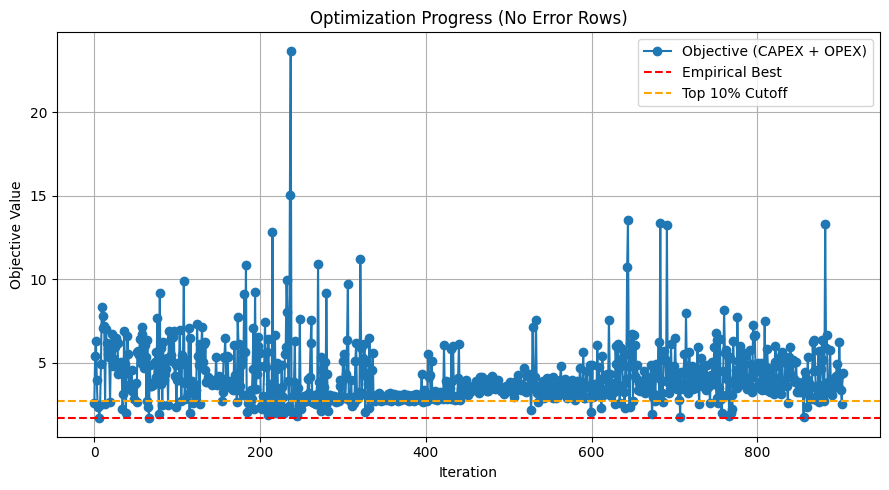

In [43]:
import numpy as np
import matplotlib.pyplot as plt

results_file = "~/MultiFidelity-ProcessOpt/3. Data/gp_bo_data_250403.csv"

# 최적화 결과 불러오기
opt_df = pd.read_csv(results_file)
# 1. Objective 계산 (에러는 100으로 처리됨)
columns = [
    'Stages', '_Lr1', '_Hr1',
    '_Lr2', '_Hr2', '_T_hex',
    '_Lr3', '_Hr3',
    'Shortcut_CAPEX', 'Shortcut_OPEX', 'Shortcut_AceticAcidWt', 'Shortcut_SplitRatio',
    'Shortcut_BoilupRatio_1', 'Shortcut_NumberStages_1', 'Shortcut_FeedStage_1', 
    'Shortcut_BoilupRatio_2','Shortcut_NumberStages_2', 'Shortcut_FeedStage_2',
    'Shortcut_BoilupRatio_3', 'Shortcut_NumberStages_3', 'Shortcut_FeedStage_3', 'Shortcut_Time',
    'Rigorous_CAPEX', 'Rigorous_OPEX', 'Rigorous_AceticAcidWt', 'Rigorous_Time'
]



# 27번과 28번 컬럼 이름 가져오기
col_27 = opt_df.columns[27]
col_28 = opt_df.columns[28]

# 해당 열 제거
opt_df = opt_df.drop(columns=[col_27, col_28])


opt_df.columns = columns + ['Objective', 'Error']
# 3. 에러가 있는 행 제거
opt_df_clean = opt_df[opt_df['Error'].isna()].copy()

# 4. Objective 계산: CAPEX + OPEX
opt_df_clean['Objective'] = opt_df_clean['Rigorous_CAPEX'] + opt_df_clean['Rigorous_OPEX']

# 5. Empirical Best 계산
empirical_best = opt_df_clean['Objective'].min()

# 6. 상위 10% 컷오프 계산 (AceticAcidWt ≥ 0.98인 경우에 대해)
# high_quality = opt_df_clean[opt_df_clean['Rigorous_AceticAcidWt'] >= 0.98]
top10_cutoff = np.percentile(opt_df_clean['Objective'], 10) if not opt_df_clean.empty else np.inf

# 7. Regret 계산
opt_df_clean['Regret'] = opt_df_clean['Objective'] - empirical_best

# 8. Success 기준 마스크
success_mask = (opt_df_clean['Objective'] <= top10_cutoff) & (opt_df_clean['Rigorous_AceticAcidWt'] >= 0.98)

# 9. Success Rate 계산
success_rate = success_mask.sum() / len(opt_df_clean)

# 10. Iterations to Target
if success_mask.any():
    itt = success_mask[success_mask].index[0] + 1
else:
    itt = None

# 11. 평균 Regret
mean_regret = opt_df_clean['Regret'].mean()

# 🔢 결과 출력
print("📈 성능 평가 지표 (Error 제외 후)")
print(f"🔹 Empirical Best Objective: {empirical_best:.4f}")
print(f"🔹 Top 10% Cutoff (AceticAcidWt ≥ 0.98): {top10_cutoff:.4f}")
print(f"🔹 평균 Regret: {mean_regret:.4f}")
print(f"🔹 Success Rate: {success_rate*100:.2f}%")
print(f"🔹 Iterations to Target: {itt if itt else '도달 못함'}")

# 🎨 시각화
plt.figure(figsize=(9, 5))
plt.plot(opt_df_clean['Objective'].values, marker='o', label='Objective (CAPEX + OPEX)')
plt.axhline(empirical_best, color='red', linestyle='--', label='Empirical Best')
if np.isfinite(top10_cutoff):
    plt.axhline(top10_cutoff, color='orange', linestyle='--', label='Top 10% Cutoff')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Optimization Progress (No Error Rows)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()